# Stress Detection using ML
> Stress, pervasive in our lives, adversely impacts mental and physical well-being. Identifying stress, especially chronic or low-level, poses a challenge.

* Leveraging social media, where users often express stress, offers a unique avenue for detection. Analyzing posts allows for discerning stress-related patterns.
* This project entails developing a machine learning model for stress detection using a Reddit dataset labeled "stressed" or "not stressed." Training the model involves identifying stress-associated features in social media posts.
* Post-training, the model enables identifying stressed social media users, facilitating support provision or stress reduction interventions.




## Import necessary libraries:

In [46]:
import pandas as pd
import numpy as np
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

## Load the dataset:

In [47]:
data = pd.read_csv("./Stress.csv")

## Data Preprocessing

In [48]:
nltk.download('stopwords')
stemmer = SnowballStemmer("english")
stopword = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

data["text"] = data["text"].apply(clean_text)


[nltk_data] Downloading package stopwords to C:\Users\ANSH
[nltk_data]     VIRAJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Create features and labels

In [49]:
x = np.array(data["text"])
y = np.array(data["label"])

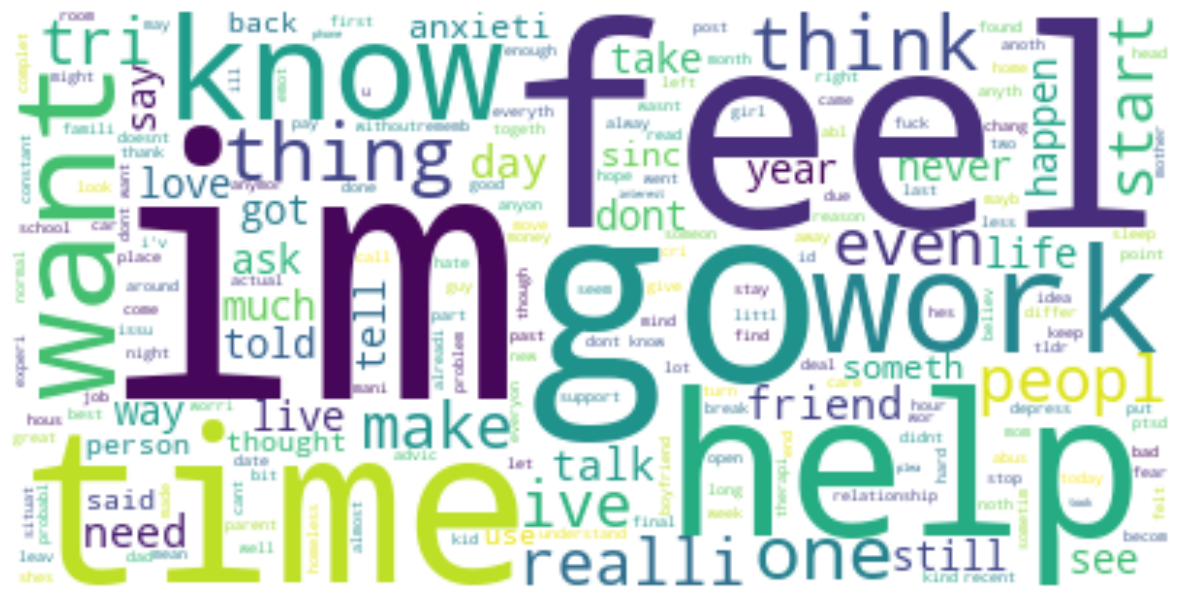

In [50]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Vectorize text data

In [51]:
cv = CountVectorizer()
X = cv.fit_transform(x)

## Split data into training and testing sets

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Train the Bernoulli Naive Bayes model

In [53]:
model = BernoulliNB()
model.fit(x_train, y_train)

BernoulliNB()

## Test the model with user input:

In [54]:
user_input = input("Enter a text: ")
user_data = cv.transform([user_input]).toarray()
prediction = model.predict(user_data)

## Print the prediction:

In [55]:
def fun(prediction):
    if prediction == 1:
        return "Stress"
    else:
        return "No Stress"

print("Detected:", fun(prediction[0]))

Detected: No Stress
